In [1]:
import pandas as pd
import seaborn as sns

Humanness = [ 70, 476, 456, 439, 403, 383, 377, 376, 374, 366, 358, 327, 123, 134, 149, 198, 248, 249, 258, 293]
Engagingness =  [ 97, 477, 482, 444, 420, 372, 367, 317, 4, 122, 137, 148, 161, 180, 185, 189, 190, 209, 266, 287]
Memorability = [ 88, 73, 56, 90, 76, 489, 448, 395, 392, 389, 368, 350, 195, 299, 262, 282, 113, 160, 243, 617]
Specificity=[ 436, 356, 355, 333, 332, 94, 64, 567, 40, 133, 144, 177, 182, 194, 224, 234, 270, 276, 285, 547]
Criteria = Humanness + Engagingness + Memorability + Specificity

In [2]:
msdg_rand = pd.read_json('/home/uj-user/Yo/hybrid-ltm/data-80/tasks-rand/MS_DG/test.jsonl', lines=True, orient='records')
msdg_fms = pd.read_json('/home/uj-user/Yo/hybrid-ltm/data-80/context-fms/MS_DG/test.jsonl', lines=True, orient='records')

msdg_rand = pd.read_json('/home/uj-user/Yo/hybrid-ltm/data-80/tasks-rand-train/MS_DG/test.jsonl', lines=True, orient='records')
msdg_fms = pd.read_json('/home/uj-user/Yo/hybrid-ltm/data-80/context-fms-train/MS_DG/test.jsonl', lines=True, orient='records')

msdg_rand

,input,output,eval_indicator
0,You will be shown a 3 session dialogues betwee...,"Student:Thanks, I will. You know, this reminds...",Rand
1,You will be shown a 4 session dialogues betwee...,Classmates B:Oh yeah? What for?\n,Rand
2,You will be shown a 4 session dialogues betwee...,"Neighbors B:Yes, I remember. What did you thin...",Rand
3,You will be shown a 3 session dialogues betwee...,"Classmates B:Sure, I'm all ears. What's your i...",Rand
4,You will be shown a 5 session dialogues betwee...,Classmates A:It's okay. I just thought about i...,Rand
...,...,...,...
75,You will be shown a 3 session dialogues betwee...,Classmates A:I'm sure with a little practice a...,Rand
76,You will be shown a 3 session dialogues betwee...,"Employee:Thank you so much, Boss. I really app...",Rand
77,You will be shown a 5 session dialogues betwee...,"Neighbors B:I understand how you feel, but I s...",Rand
78,You will be shown a 5 session dialogues betwee...,Co-workers B:Maybe it's time to start looking ...,Rand


In [5]:
# msdg_rand['eval_indicator'] = sum([['Rand_'+criteria]*20 for criteria in ['Memorability', 'Humanness', 'Engagingness',  'Specificity']],[])
msdg_rand['eval_indicator'] = sum([[criteria]*20 for criteria in ['Memorability', 'Humanness', 'Engagingness',  'Specificity']],[])
msdg_rand

,input,output,eval_indicator
0,You will be shown a 3 session dialogues betwee...,"Student:Thanks, I will. You know, this reminds...",Memorability
1,You will be shown a 4 session dialogues betwee...,Classmates B:Oh yeah? What for?\n,Memorability
2,You will be shown a 4 session dialogues betwee...,"Neighbors B:Yes, I remember. What did you thin...",Memorability
3,You will be shown a 3 session dialogues betwee...,"Classmates B:Sure, I'm all ears. What's your i...",Memorability
4,You will be shown a 5 session dialogues betwee...,Classmates A:It's okay. I just thought about i...,Memorability
...,...,...,...
75,You will be shown a 3 session dialogues betwee...,Classmates A:I'm sure with a little practice a...,Specificity
76,You will be shown a 3 session dialogues betwee...,"Employee:Thank you so much, Boss. I really app...",Specificity
77,You will be shown a 5 session dialogues betwee...,"Neighbors B:I understand how you feel, but I s...",Specificity
78,You will be shown a 5 session dialogues betwee...,Co-workers B:Maybe it's time to start looking ...,Specificity


## EDA

In [6]:
def text_length_statistics(df):
    text_col = df['output']
    lengths = text_col.str.len()

    # 통계를 계산합니다.
    min_length = lengths.min()
    max_length = lengths.max()
    mean_length = lengths.mean()
    median_length = lengths.median()
    std_length = lengths.std()

    return min_length, max_length, mean_length, median_length, std_length


min_length, max_length, mean_length, median_length, std_length = text_length_statistics(msdg_rand)
print("최소 길이:", min_length)
print("최대 길이:", max_length)
print("평균 길이:", mean_length)
print("중간 길이:", median_length)
print("표준편차:", std_length)

최소 길이: 28
최대 길이: 226
평균 길이: 116.65
중간 길이: 115.5
표준편차: 46.75199853576965


In [7]:
min_length, max_length, mean_length, median_length, std_length = text_length_statistics(msdg_fms)
print("최소 길이:", min_length)
print("최대 길이:", max_length)
print("평균 길이:", mean_length)
print("중간 길이:", median_length)
print("표준편차:", std_length)

최소 길이: 69
최대 길이: 292
평균 길이: 152.875
중간 길이: 139.5
표준편차: 47.45960974304388


In [8]:
msdg_rand["input_len"] = msdg_rand.input.str.len()
msdg_rand["output_len"] = msdg_rand.output.str.len()
msdg_fms["input_len"] = msdg_fms.input.str.len()
msdg_fms["output_len"] = msdg_fms.output.str.len()
msdg_rand

,input,output,eval_indicator,input_len,output_len
0,You will be shown a 3 session dialogues betwee...,"Student:Thanks, I will. You know, this reminds...",Memorability,4231,154
1,You will be shown a 4 session dialogues betwee...,Classmates B:Oh yeah? What for?\n,Memorability,4628,32
2,You will be shown a 4 session dialogues betwee...,"Neighbors B:Yes, I remember. What did you thin...",Memorability,5377,55
3,You will be shown a 3 session dialogues betwee...,"Classmates B:Sure, I'm all ears. What's your i...",Memorability,2624,51
4,You will be shown a 5 session dialogues betwee...,Classmates A:It's okay. I just thought about i...,Memorability,7285,183
...,...,...,...,...,...
75,You will be shown a 3 session dialogues betwee...,Classmates A:I'm sure with a little practice a...,Specificity,2947,148
76,You will be shown a 3 session dialogues betwee...,"Employee:Thank you so much, Boss. I really app...",Specificity,3943,81
77,You will be shown a 5 session dialogues betwee...,"Neighbors B:I understand how you feel, but I s...",Specificity,6738,144
78,You will be shown a 5 session dialogues betwee...,Co-workers B:Maybe it's time to start looking ...,Specificity,5619,66


In [9]:
msdg_rand['rand']=1
msdg_fms['rand']=0
msdg_all = pd.concat([msdg_fms,msdg_rand], ignore_index=True)
msdg_all

,input,output,eval_indicator,input_len,output_len,rand
0,You will be shown a 3 session dialogues betwee...,"Doctor:Ah yes, jet lag can be tough. It's impo...",Engagingness,3958,203,0
1,You will be shown a 3 session dialogues betwee...,"Neighbors A:Well, I have some experience with ...",Specificity,2742,238,0
2,You will be shown a 4 session dialogues betwee...,Co-workers B:That's a good perspective to have...,Memorability,3953,189,0
3,You will be shown a 2 session dialogues betwee...,"Mentee:Exactly, Mentor. I remember a time in m...",Specificity,1830,221,0
4,You will be shown a 5 session dialogues betwee...,"Classmates B:Yes, I'll never forget that. It w...",Humanness,6116,119,0
...,...,...,...,...,...,...
155,You will be shown a 3 session dialogues betwee...,Classmates A:I'm sure with a little practice a...,Specificity,2947,148,1
156,You will be shown a 3 session dialogues betwee...,"Employee:Thank you so much, Boss. I really app...",Specificity,3943,81,1
157,You will be shown a 5 session dialogues betwee...,"Neighbors B:I understand how you feel, but I s...",Specificity,6738,144,1
158,You will be shown a 5 session dialogues betwee...,Co-workers B:Maybe it's time to start looking ...,Specificity,5619,66,1


In [10]:
compare_criteria = 'Engagingness' #  'Memorability', 'Humanness', 'Engagingness',  'Specificity'


msdg_rand[msdg_rand['eval_indicator']==compare_criteria]['output'].to_list()

["Parent:You've definitely been succeeding at that. And I know I've been hard on you in the past, but I just want you to know that I'm sorry for snapping at you and not doing my share around the house. I'll try to do better.\n",
 "Parent:That's right. I think it's important to keep talking about these things and working towards a better world.\n",
 'Classmates A:Yes, absolutely. And it reminds me of when I left my bed unmade the other day and just went straight to the kitchen to make breakfast. It was a little thing, but it made such a difference in how I started my day.\n',
 "Mentee:Not really, it's just little things that add up. Like if someone makes a comment that I take personally, or if I feel like I'm not being included in something.\n",
 'Classmates B:Oh my gosh, that sounds terrible! Was I okay in the dream? Did you help me?\n',
 "Doctor: That's a great mindset to have. It's important to take care of our bodies and prioritize our health. How did you manage to lose the weight?\

In [11]:
msdg_fms[msdg_fms['eval_indicator']==compare_criteria]['output'].to_list()

["Doctor:Ah yes, jet lag can be tough. It's important to give your body enough time to adjust to the new time zone. Speaking of travel, do you remember when you got ready for your surgery a few years ago?\n",
 'Neighbors A:Yeah, that could be fun. Remember when I repaired that cupboard a few months ago? It really made the house look nicer.\n',
 "Doctor:That's great to hear. I'm glad you're enjoying the class. Do you feel like you're keeping up with the coursework?\n",
 'Classmates A:Thanks, I appreciate the support. Did you have any tips for studying for finals?\n',
 "Wife:Yes, it's amazing how life turns out. Speaking of which, do you still have your heart set on finding a sunken treasure ship?\n",
 "Doctor:That's great to hear! It's important to have a clear vision of what you want in life. What are some of your goals?\n",
 "Neighbors A:Definitely. Speaking of being careful, have you been doing okay at work? I talked to your co-worker and they mentioned that you've been taking a lot 

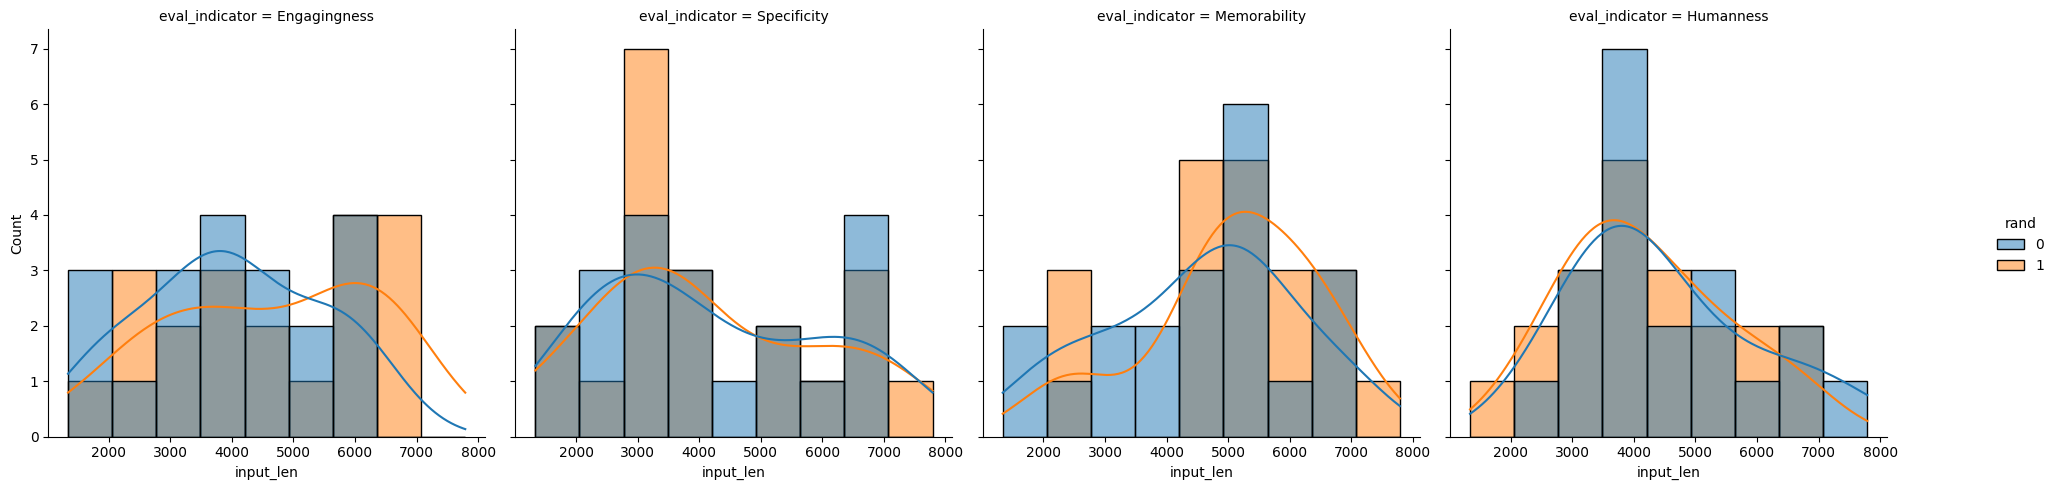

In [11]:
sns.displot(data=msdg_all, x='input_len', col='eval_indicator', hue='rand', facet_kws=dict(margin_titles=True), kde=True)#, #hue='eval_indicator', kde=True)	

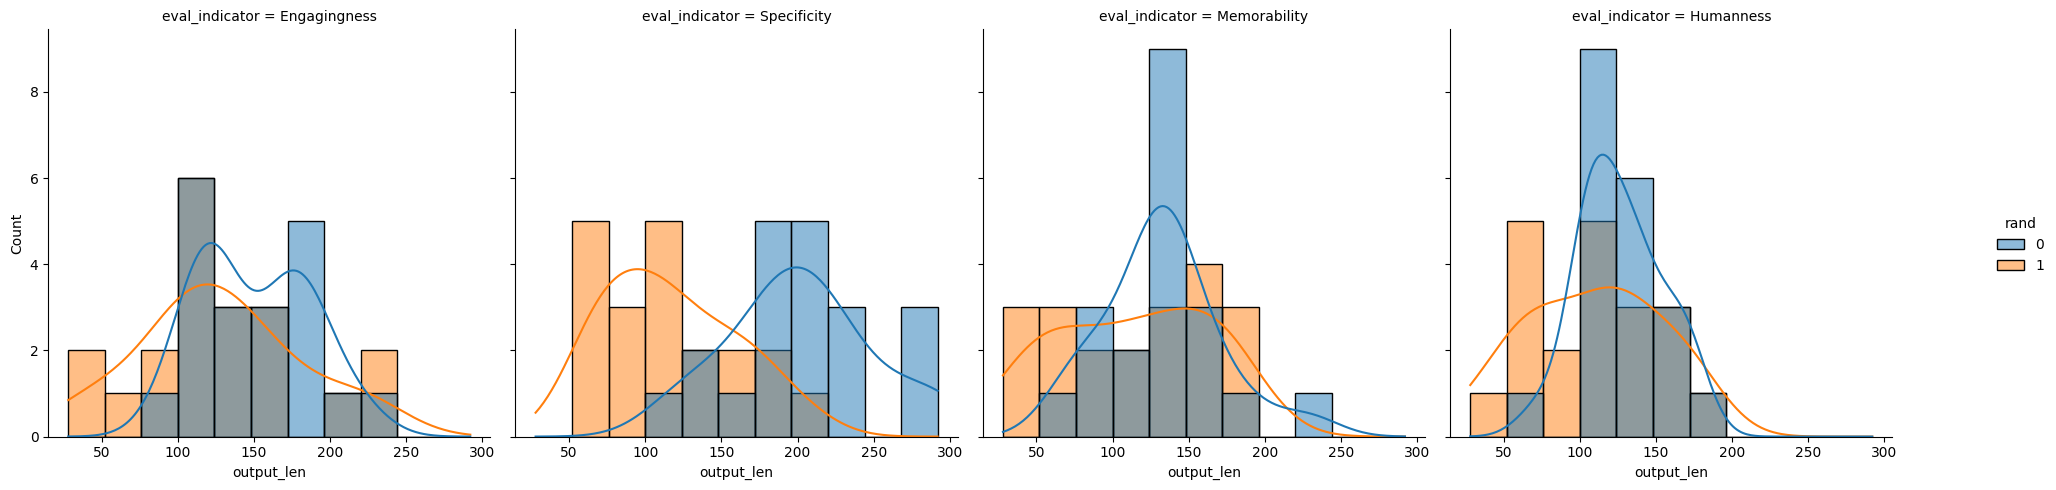

In [12]:
sns.displot(data=msdg_all, x='output_len', col='eval_indicator', hue='rand', facet_kws=dict(margin_titles=True), kde=True)#, #hue='eval_indicator', kde=True)

<Axes: xlabel='input_len', ylabel='Count'>

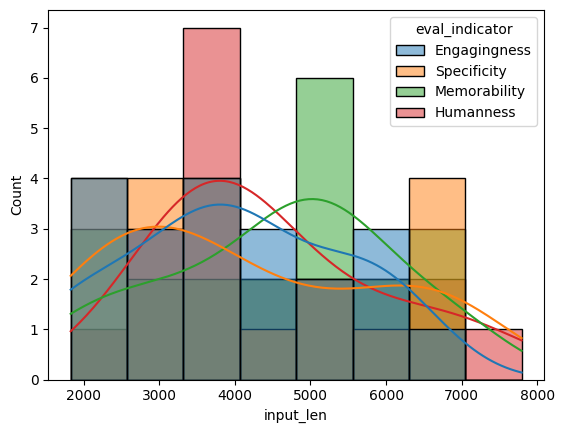

In [13]:
sns.histplot(data=msdg_fms, x='input_len', hue='eval_indicator', kde=True)

In [ ]:
sns.histplot(data=msdg_fms, x='output_len', hue='eval_indicator', kde=True)

<Axes: xlabel='output_len', ylabel='Count'>

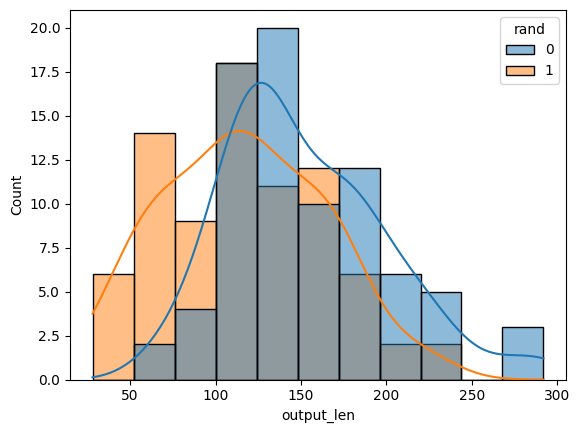

In [14]:
sns.histplot(data=msdg_all, x='output_len', hue='rand', kde=True)

In [21]:
criteria = "Engagingness"
msdg_all.rename(columns={'input':'conversation', 'output':'response'}, inplace=True)
msdg_all[msdg_all['eval_indicator']=='Engagingness'].to_csv(f'context-fms-train-msdg-test-{criteria}.csv', index=False)

In [20]:
msdg_all

,conversation,response,eval_indicator,input_len,output_len,rand
0,You will be shown a 3 session dialogues betwee...,"Doctor:Ah yes, jet lag can be tough. It's impo...",Engagingness,3958,203,0
1,You will be shown a 3 session dialogues betwee...,"Neighbors A:Well, I have some experience with ...",Specificity,2742,238,0
2,You will be shown a 4 session dialogues betwee...,Co-workers B:That's a good perspective to have...,Memorability,3953,189,0
3,You will be shown a 2 session dialogues betwee...,"Mentee:Exactly, Mentor. I remember a time in m...",Specificity,1830,221,0
4,You will be shown a 5 session dialogues betwee...,"Classmates B:Yes, I'll never forget that. It w...",Humanness,6116,119,0
...,...,...,...,...,...,...
155,You will be shown a 3 session dialogues betwee...,Classmates A:I'm sure with a little practice a...,Specificity,2947,148,1
156,You will be shown a 3 session dialogues betwee...,"Employee:Thank you so much, Boss. I really app...",Specificity,3943,81,1
157,You will be shown a 5 session dialogues betwee...,"Neighbors B:I understand how you feel, but I s...",Specificity,6738,144,1
158,You will be shown a 5 session dialogues betwee...,Co-workers B:Maybe it's time to start looking ...,Specificity,5619,66,1
